# Bank-Marketing
Creating a logistic regression model using python on a bank data, to find out if the customer have subscribed to a specific plan or not.

## Problem Statement
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In this project, you need to build a model for deciding whether a campaign will be successful in getting a client to sign up for the term deposits.

## Dataset
The dataset is in the form of a csv file and the link to download is given below:
https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv

## Data Description
Bank client data

- age (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")


### Data related to the last contact of the current campaign

- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)

### Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):

- y: has the client subscribed a term deposit? (binary: "yes","no")

## Objectives
You are required to prepare a well-commented an interactive python notebook as your solution to this problem statement. The notebook must meet the following objectives:

- Clean the data and drop useless columns.
- Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features, remove outliers and correlated variables if necessary.
- Visualize the distributions of various features and correlations between them.
- Perform feature engineering to extract the correct features for the model.
- Build a logistic regression model
- Evaluate the model used.

## Model Evaluation
When you're done with the model building and residual analysis and have made predictions on the test set, just make sure you use y_test and y_pred.

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set. Also, remember if the VIF for the selected features is not coming high always check the p-values of the variables before applying the model on test data.

# Logistic Regression Assignment

## Total Marks: 100

## Instructions:
- This assignment is designed to test your ability to build and evaluate a logistic regression model using the given dataset.
- Follow the steps provided and answer each question with proper analysis and visualizations.
- Ensure that you add comments explaining each step in your code.
- Submit your completed Jupyter Notebook file.

---








### Submission Guidelines:
- Ensure your notebook is well-structured and properly commented.
- Submit the completed Jupyter Notebook (.ipynb) file.




## Grading Criteria:
1. **Data Loading & Inspection** - 10 marks
2. **Data Cleaning** - 10 marks
3. **Descriptive Statistics** - 10 marks
4. **Univariate Analysis** - 10 marks
5. **Bivariate Analysis** - 10 marks
6. **Multivariate Analysis** - 10 marks
7. **Heatmap & Correlation Analysis** - 10 marks
8. **Building Logistic Regression Model** - 15 marks
9. **Model Evaluation & Interpretation** - 10 marks
10. **Final Conclusion** - 5 marks

---


## Questions:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Python/Colab Notebooks/Python EDA/bank.csv"

Mounted at /content/drive


1. Load the Data (5 marks)
Load the dataset into a Pandas DataFrame.
Display the first five rows to understand the structure.
Check for missing values.

In [ ]:
#read csv file
df=pd.read_csv(data_path)
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [ ]:
df.to_csv("bank.csv")

# New Section

In [ ]:
df.shape

(4521, 17)

In [ ]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array,
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

df[~df.map(np.isreal).all(1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


2. Data Inspection (5 marks)
Display the data types of all columns.
Check for duplicate values and handle them if necessary.
Identify the target variable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB



### 3. Data Cleaning (10 marks)
- Handle missing values appropriately.
- Check for outliers using box plots.
- Perform any necessary transformations.

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# There are no missing values


In [ ]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['marital_LabelEncoder'] = le.fit_transform(df['marital'])
df['education_LabelEncoder'] = le.fit_transform(df['education'])
df['default_LabelEncoder'] = le.fit_transform(df['default'])
df['housing_LabelEncoder'] = le.fit_transform(df['housing'])
df['loan_LabelEncoder'] = le.fit_transform(df['loan'])
df['contact_LabelEncoder'] = le.fit_transform(df['contact'])
df['month_LabelEncoder'] = le.fit_transform(df['month'])
df['poutcome_LabelEncoder'] = le.fit_transform(df['poutcome'])
df['y_LabelEncoder'] = le.fit_transform(df['y'])
df['job_LabelEncoder'] = le.fit_transform(df['job'])
df.head(20)
#job_map = {'blue-collared' : 3, 'student' : 4, 'admin,' : 5, 'services' : 6, 'management' : 7, 'technician' : 8, 'entrepreneur' : 9, 'self-employed' : 10, 'retired' : 11, 'housemaid' : 12, 'blue-collar' : 13,  'unknown': 2, 'unemployed': 1, 'technician': 0}  # Custom order
#df['Job_ManualMap'] = df['job'].map(job_map)
df.head(20)
df.to_csv("bank_encoder.csv")

In [ ]:
#Lets analysze the distribution of the various attributes
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0
marital_LabelEncoder,4521.0,1.147755,0.599650,0.0,1.0,1.0,2.0,2.0
education_LabelEncoder,4521.0,1.231365,0.748744,0.0,1.0,1.0,2.0,3.0
default_LabelEncoder,4521.0,0.016810,0.128575,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='age'>

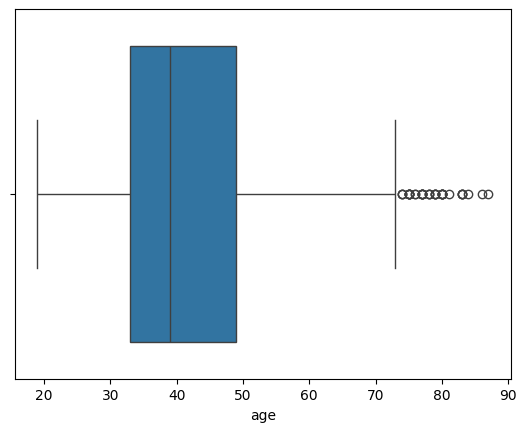

In [ ]:
#Box plots

sns.boxplot(data=df, x="age")
# Most of the clients are between ages 32 to 48

<Axes: xlabel='education'>

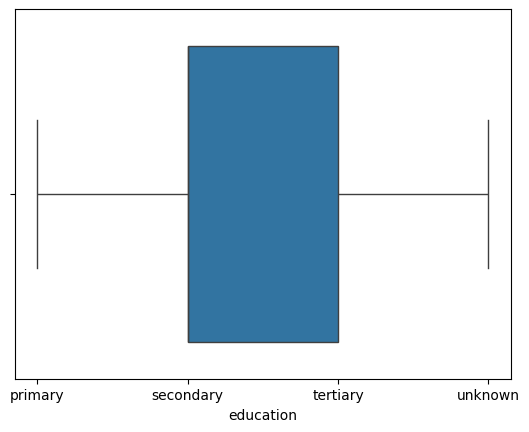

In [ ]:

sns.boxplot(data=df, x="education")
#most of the clients have secondary and tertiary education

<Axes: xlabel='contact'>

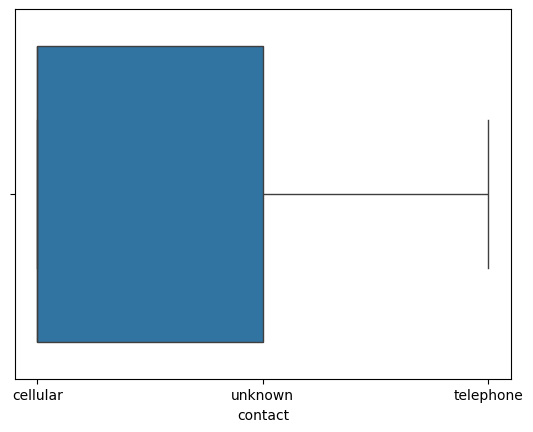

In [ ]:
sns.boxplot(data=df, x="contact")
#most of the clients have been contacted by cellphone

### 4. Descriptive Statistics (10 marks)
- Generate summary statistics for numerical variables.
- Provide insights on the distribution of key variables.

# Most of the clients has not subscribed a term deposit. The ratio is almost 1:4 in favor or class 'no'.  The model's ability to predict class 'no' will be better than predicting class 1.

In [ ]:
# Let us look at the target column which is 'y' to understand how the data is distributed amongst the various values
df.groupby(["y"]).count()

# Most of the clients has not subscribed a term deposit. The ratio is almost 1:4 in favor or class 'no'.  The model's ability to predict class 'no' will
# be better than predicting class 1.

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_LabelEncoder,education_LabelEncoder,default_LabelEncoder,housing_LabelEncoder,loan_LabelEncoder,contact_LabelEncoder,month_LabelEncoder,poutcome_LabelEncoder,y_LabelEncoder,job_LabelEncoder
y,,,,,,,,,,,,,,,,,,,,,
no,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,...,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
yes,521,521,521,521,521,521,521,521,521,521,...,521,521,521,521,521,521,521,521,521,521


### 5. Univariate Analysis (10 marks)
- Perform and visualize univariate analysis on each column separately.
- Use histograms, boxplots, and value counts where applicable.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(df, column):
    """Creates a side-by-side histogram and boxplot for a given column."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

    print(df[column].describe())


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'marital_LabelEncoder',
       'education_LabelEncoder', 'default_LabelEncoder',
       'housing_LabelEncoder', 'loan_LabelEncoder', 'contact_LabelEncoder',
       'month_LabelEncoder', 'poutcome_LabelEncoder', 'y_LabelEncoder',
       'job_LabelEncoder'],
      dtype='object')

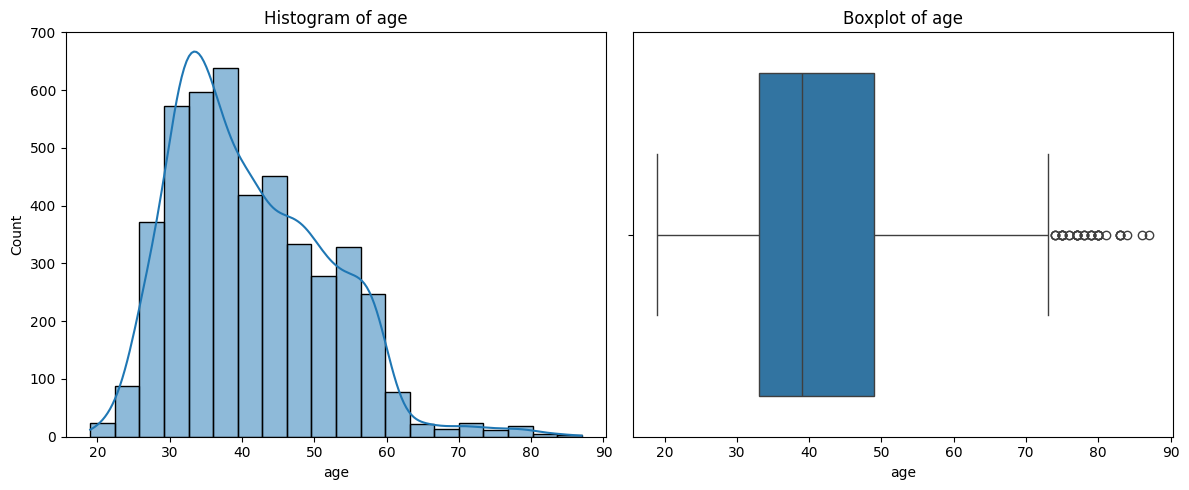

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64


In [ ]:
histogram_boxplot(df, 'age')
#most of the clients are between ages 32 to 50

In [ ]:
#Manual Label Encoding using map()
from sklearn.preprocessing import LabelEncoder

#histogram_boxplot(df, 'Job_ManualMap')


observations based on the plots:

Histogram Insights:

The distribution of age is right-skewed, with most values concentrated between 32 and 48 years.
The peak in the histogram occurs near 35 years.
A density curve overlay suggests smooth trends in probability density.

Job cannot be used as a classification feature

Boxplot Insights:

Median age is 39 years, and the interquartile range spans from 19 to 49 years.
Outliers are visible beyond 65 years, indicating a few extreme cases.

### 6. Bivariate Analysis (10 marks)
- Analyze the relationship of each independent variable with the target variable.
- Use scatter plots, bar plots, and box plots for visualization.

In [ ]:
def plot_boxplot(df, column, target='y'):
    """
    Creates a boxplot for a numerical column against the target column.

    Parameters:
        df (pd.DataFrame): The dataset.
        column (str): The numerical column to plot.
        target (str): The categorical column (default is 'y').
    """
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[target], y=df[column])
    plt.title(f"Boxplot of {column} vs {target}")
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()


In [ ]:

    df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'marital_LabelEncoder',
       'education_LabelEncoder', 'default_LabelEncoder',
       'housing_LabelEncoder', 'loan_LabelEncoder', 'contact_LabelEncoder',
       'month_LabelEncoder', 'poutcome_LabelEncoder', 'y_LabelEncoder',
       'job_LabelEncoder'],
      dtype='object')

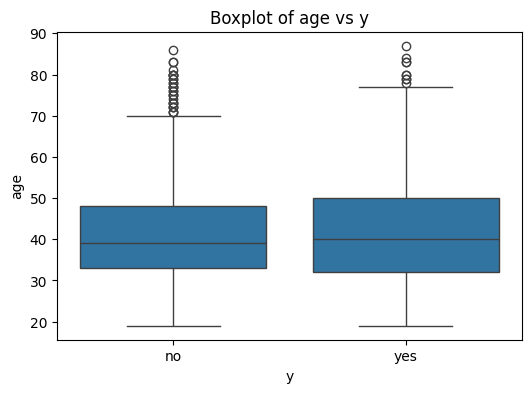

In [ ]:
plot_boxplot(df, 'age')
# there is poor correlation beltween age and subscribers.
# There is  substantial overlap between the two groups, meaning age alone is not a definitive predictor of subscribers


Observations from the Boxplot (Age vs Suscribers)
There is poor correlation between age and subscribers.

There is  substantial overlap between the two groups, meaning age alone is not a definitive predictor of subscribers

Key takeaways:
Age cannot be used to determine the classification


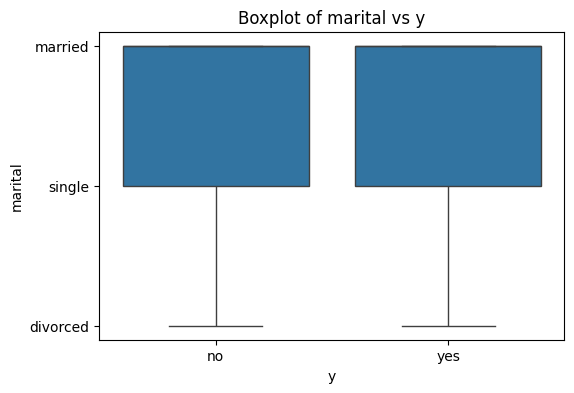

In [ ]:
plot_boxplot(df, 'marital')


Observations from the Boxplot (Marital status vs Suscribers) There is poor correlation between age and subscribers.

There is substantial overlap between the two groups, meaning marital status alone is not a definitive predictor of subscribers

Key takeaways: marital status cannot be used to determine the classification

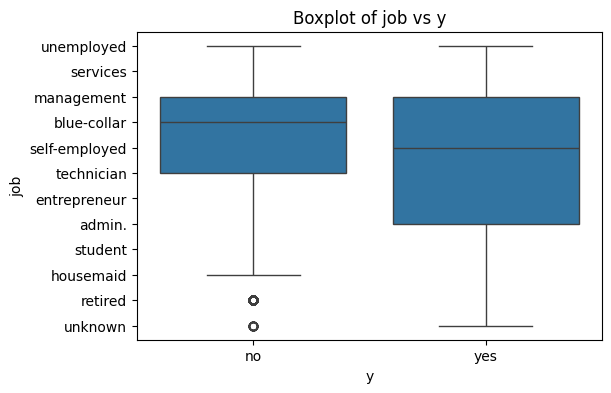

In [ ]:
plot_boxplot(df, 'job')

Observations from the Boxplot (Job job vs Suscribers)

There is substantial overlap between the subscribers that are in management, blue-collar, self-employed and technician groups, meaning these jobs cannot be used as a definitive predictor of subscribers

Key takeaways: subscribers in admin and entrepreneur jobs subscried the most


### 7. Multivariate Analysis (10 marks)
- Check for correlations between numerical features.
- Perform pairwise analysis using pair plots or correlation matrices.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'marital_LabelEncoder',
       'education_LabelEncoder', 'default_LabelEncoder',
       'housing_LabelEncoder', 'loan_LabelEncoder', 'contact_LabelEncoder',
       'month_LabelEncoder', 'poutcome_LabelEncoder', 'y_LabelEncoder',
       'job_LabelEncoder'],
      dtype='object')

In [ ]:
# Step 7: Multivariate Analysis (Pairplot)
X = df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y'])

sns.pairplot(df, hue='y')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 8. Heatmap & Correlation Analysis (10 marks)
- Generate a heatmap to visualize feature correlations.
- Interpret the results to understand feature dependencies.

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_LabelEncoder,education_LabelEncoder,default_LabelEncoder,housing_LabelEncoder,loan_LabelEncoder,contact_LabelEncoder,month_LabelEncoder,poutcome_LabelEncoder,y_LabelEncoder,job_LabelEncoder
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,1,0,0,0,0,0,10,3,0,10
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,1,1,0,1,1,0,8,0,0,7
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,2,2,0,1,0,0,0,0,0,4
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,1,2,0,1,1,2,6,3,0,4
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,1,1,0,1,0,2,8,3,0,1


In [ ]:
df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,marital_LabelEncoder,education_LabelEncoder,default_LabelEncoder,housing_LabelEncoder,loan_LabelEncoder,contact_LabelEncoder,month_LabelEncoder,poutcome_LabelEncoder,y_LabelEncoder,job_LabelEncoder
0,30,1787,19,79,1,-1,0,1,0,0,0,0,0,10,3,0,10
1,33,4789,11,220,1,339,4,1,1,0,1,1,0,8,0,0,7
2,35,1350,16,185,1,330,1,2,2,0,1,0,0,0,0,0,4
3,30,1476,3,199,4,-1,0,1,2,0,1,1,2,6,3,0,4
4,59,0,5,226,1,-1,0,1,1,0,1,0,2,8,3,0,1


In [ ]:
df.head(100)

,age,balance,day,duration,campaign,pdays,previous,marital_LabelEncoder,education_LabelEncoder,default_LabelEncoder,housing_LabelEncoder,loan_LabelEncoder,contact_LabelEncoder,month_LabelEncoder,poutcome_LabelEncoder,y_LabelEncoder,job_LabelEncoder
0,30,1787,19,79,1,-1,0,1,0,0,0,0,0,10,3,0,10
1,33,4789,11,220,1,339,4,1,1,0,1,1,0,8,0,0,7
2,35,1350,16,185,1,330,1,2,2,0,1,0,0,0,0,0,4
3,30,1476,3,199,4,-1,0,1,2,0,1,1,2,6,3,0,4
4,59,0,5,226,1,-1,0,1,1,0,1,0,2,8,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41,1567,1,291,2,-1,0,2,2,0,0,0,0,5,3,0,11
96,41,5426,14,149,2,-1,0,1,2,0,1,0,2,8,3,0,0
97,30,261,19,233,1,137,20,2,2,0,0,0,0,10,0,0,0
98,36,2843,12,473,1,182,1,0,1,0,0,0,0,3,2,0,1


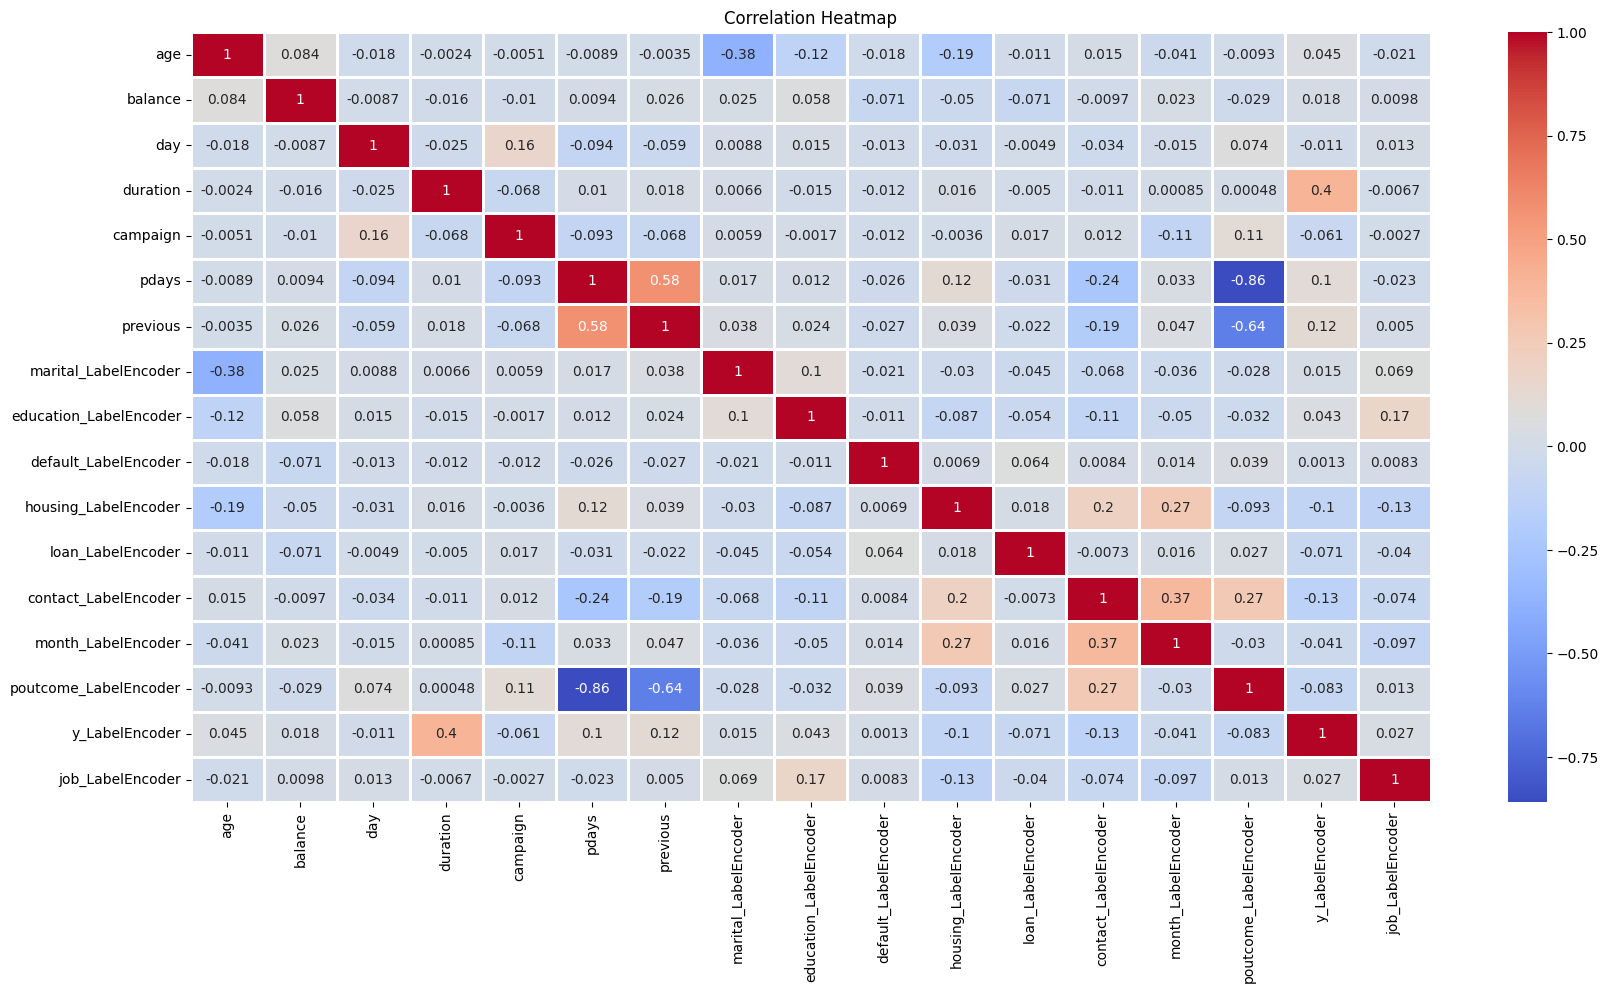

In [ ]:
#df.head()
# Step 8: Heatmap

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


Observations from the Correlation Heatmap
Duration has the highest correlation with the class label (0.4) → This suggests that longer the duration is we get more subscribers.

pdays and previous have weak correlations with class (~0.1-0.12) → These features are less predictive than duration.

Strong correlations among independent variables:

Previous & Pdays (0.58) → It is obvious that the previous contacts are related
.
Month & Contact (0.37) → Lost contact month and communication type are linked.
poutcome & contact (0.27) -> outcome was good based on the contact/communication type


Day & Month has low correlation with class (0.17)

Balance, Marital and Loan  has weak associations with all variables
Key Takeaway:
Duration is the most relevant predictors for subscribers in this dataset. Other Features like contribute less to the classification.



### 9. Build Logistic Regression Model (15 marks)
- Split the data into training and testing sets.
- Train a logistic regression model on the training data.
- Display the model coefficients and intercept.

In [ ]:
# Step 9: Build Logistic Regression Model
X = df.drop(columns=['y_LabelEncoder'])

y = df['y_LabelEncoder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.isnull().sum()

,0
age,0
balance,0
day,0
duration,0
campaign,0
pdays,0
previous,0
marital_LabelEncoder,0
education_LabelEncoder,0
default_LabelEncoder,0


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

10. Model Evaluation (10 marks)


*   Generate the confusion matrix
*   Compute accuracy, precision, recall, and F1-score.
*   Interpret the classification report.


In [ ]:
# Step 10: Model Evaluation
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[791  16]
 [ 80  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.53      0.18      0.27        98

    accuracy                           0.89       905
   macro avg       0.72      0.58      0.61       905
weighted avg       0.87      0.89      0.87       905

Accuracy Score: 0.8939226519337017


### 11. Interpretation of Metrics (10 marks)
- Analyze the model's performance based on the evaluation metrics.
- Explain any trade-offs observed in precision and recall.


The classification report shows precision, recall, f1-score, and support for each class.
Accuracy alone might not be enough if data is imbalanced, so consider F1-score.

### **Analysis of the Classification Metrics:**

#### **1. Confusion Matrix Interpretation**
$
\begin{bmatrix}
791 & 16 \\
80 & 18
\end{bmatrix}
$
- **True Positives (TP) = 18** → Class 1 correctly predicted as 1.  
- **True Negatives (TN) = 791** → Class 0 correctly predicted as 0.  
- **False Positives (FP) = 16** → Class 0 misclassified as 1.  
- **False Negatives (FN) = 80** → Class 1 misclassified as 0.  

#### **2. Classification Report Insights**
| Metric          | Class 0 (Negative) | Class 1 (Positive) |
|----------------|------------------|------------------|
| **Precision**  | 0.91             | 0.53             |
| **Recall**     | 0.98             | 0.18             |
| **F1-score**   | 0.94             | 0.27             |
| **Support**    | 807              | 98               |

- **Accuracy = 89%** → Overall, the model correctly classifies **89%** of the samples.
- **Precision:**  
  - For Class 0: **91%** of predicted Class 0 instances are actually Class 0.  
  - For Class 1: **53%** of predicted Class 1 instances are actually Class 1.  
  - **Lower precision for Class 1** suggests some misclassifications of Class 0 as Class 1 (False Positives).  

- **Recall:**  
  - For Class 0: **98%** of actual Class 0 instances are correctly identified.  
  - For Class 1: **18%** of actual Class 1 instances are correctly identified.  
  - **Lower recall for Class 1** suggests that many positive cases (subscribers, in a bank dataset) are being misclassified as negative (False Negatives).  

- **F1-score:**  
  - Lower for Class 1 (**0.27**) compared to Class 0 (**0.94**), indicating an **imbalance in performance between classes**.  

#### **3. Macro & Weighted Averages**
- **Macro Avg (0.61 F1-score)** → Equal weighting for both classes, revealing **class imbalance issues** (Class 1 is underperforming).  
- **Weighted Avg (0.87 F1-score)** → Accounts for class distribution, aligning with overall accuracy.

### **Key Observations:**
1. **Good performance for Class 0 (Non-Diabetic) but weaker for Class 1 (Diabetic).**
2. **Lower recall for Class 1 (18%) means many positive cases are missed (False Negatives).**
3. **Potential Issue:** If detecting Class 1 is critical (e.g., subscriber count), the model should be improved for better recall.
4. **Possible Improvements:**
   - **Balance the dataset** (oversampling minority class or undersampling majority class).
   - **Adjust classification threshold** (optimize recall vs. precision tradeoff).
   - **Use different evaluation metrics like AUC-ROC** to analyze class separability.



### 12. Final Conclusion (5 marks)
- Summarize the key findings from the analysis.
- Provide suggestions for potential improvements or alternative approaches.

---

#Macro vs weighted avg:
##What to Look for in a Good Model?
 - Macro Avg and Weighted Avg should be close → Indicates balanced performance across classes.

 - If Macro Avg is much lower than Weighted Avg, the model is likely favoring the majority class and struggling with minority classes.

 - If Weighted Avg is high but Macro Avg is low, the model needs improvement on minority classes.